# Forecast for Monopole and Dipole

The prediction for the magnitude of the SGWB in this notebook is done with the results for the estimators $p_0$ and $p_1$ reported in 2412.14010

In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import matplotlib

font = {'size': 16, 'family':'Serif'}
#font = {'size': 18, 'family':'Latin Modern Roman'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

$\Delta p_0 = \frac{\sigma^2_N}{\sqrt{3/|(2n_I+1)|} N_{\rm star}}\times \left[ \frac{T_{\rm obs}}{1 \mathrm{yr} } \right]^{n_I} \\
    \Delta p_1 = \frac{\sigma^2_N}{\sqrt{0.65 /|(2n_I+1)|} N_{\rm star}}\times \left[ \frac{T_{\rm obs}}{1 \mathrm{yr} } \right]^{n_I}$

In [15]:
year = 365*24*3600 # Seconds
nobsinyear = 2*12 # Assuming stars are observed twice a month
fstar = (365*24*3600)**(-1) #1/year
T_obs = 15/fstar
nobstot = nobsinyear*(T_obs/year)
T_cad = year/15
print('1/ T_cad',1/T_cad)

h0 = 2.15e-18
beta = 1.23e-3

conversion = (2*(np.pi**2)*(fstar**2))*(2*fstar)/(3*(h0**2))

def Delta_p0(sigma, N, factor):
    sigma_N_sq = 2 * (sigma**2) *T_cad
    f_min = 1/T_obs
    #f_max = 3.17e-8
    f_max = 1/T_cad
    freq_int = (fstar/(2*nI +1)) * (((f_max/fstar)**(2*nI +1)) - (f_min/fstar)**(2*nI +1) )
    Dp0 = (sigma_N_sq/(N * np.sqrt(factor*T_obs) ) ) * ((freq_int)**(-1/2))
    return Dp0

from scipy.integrate import quad

def df_int(nI):
    df_int = lambda f: (f/ fstar)**nI
    lower_limit = 1/T_obs
    #upper_limit = 3.17e-8
    upper_limit = 1/T_cad #5e-8
    result, error = quad(df_int, lower_limit, upper_limit)
    return result

def deltaI0(sigma, N, factor, nI):
    deltaI0 = 8 * np.pi * Delta_p0(sigma, N, factor)/df_int(nI) #* (1/2) 
    return deltaI0

def deltaI0_dipole(sigma, N, factor, nI):
    deltaI0 = (8 * np.pi / (4*beta)) * Delta_p0(sigma, N, factor)/df_int(nI)
    return deltaI0
    
def deltaI0_dipoleTimesbeta(sigma, N, factor, nI):
    deltaI0b = (8*np.pi) * Delta_p0(sigma, N, factor)/df_int(nI)
    return deltaI0b


# Test to see if the functions above are working
nI = -7/3 # Equivalent to gamma = 13/3 or alpha = -2/3
#nI = 1
factor00 = 3 # proportionality constant for the Trace[H0 H0]
print(df_int(nI))
print(deltaI0( 2.42e-7, nI, 1000, factor00))

# Conversion between sigma = 50 mas and sigma in radians.
Sig1 = 50 *(1/1000)*(1/3600)*(2*np.pi/360) # Values taken from the paper G Mentasti and CR Contaldi 
Sig2 = 0.01 *(1/1000)*(1/3600)*(2*np.pi/360) # 'Observing GW with Solar system Astrometry'.
Sig3 = 1 *(1/1000)*(1/3600)*(2*np.pi/360) 
print(Sig1, Sig2, Sig3)


1/ T_cad 4.756468797564688e-07
8.791416740226932e-07
-7.212129064776704e-07
2.42406840554768e-07 4.8481368110953605e-11 4.8481368110953594e-09


# Monopole

Omega_GW0 = 8.26005870077782e-09


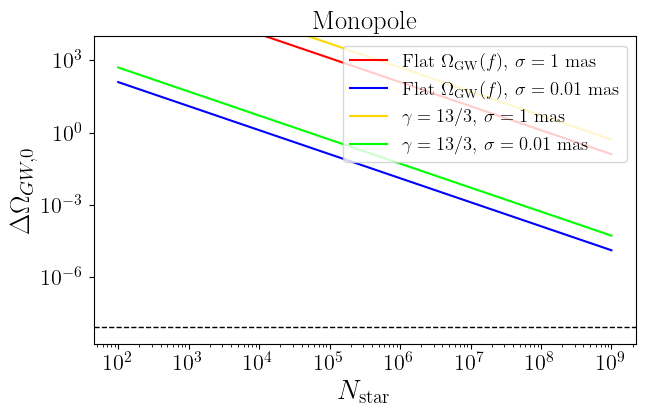

In [16]:
#nI_1 = 0
nI_2 = -7/3
nI_3 = -3 # This gives flat \Omega_{GW}(f) (Inflation)
factor00 = 3 # proporcionality constant for the Trace[H0 H0]
N = np.arange(10e1, 10e8, 1000)

sigma1 = 2.42e-7 # Equivalent to 50 mas in radians.
sigma2 = 4.84e-11 # Equivalent to 0.01 mas in radians.
sigma3 = 4.84e-09 # Equivalent to 1 mas in radians.

D_OmegaGW_1 = deltaI0( sigma3, N, factor00, nI_3)*conversion
D_OmegaGW_2 = deltaI0( sigma2, N, factor00, nI_3)*conversion
D_OmegaGW_3 = deltaI0( sigma3, N, factor00, nI_2)*conversion
D_OmegaGW_4 = deltaI0( sigma2, N, factor00, nI_2)*conversion

I0 = 9.1e-23 # Value reported by NANOGrav (NG15)
Omega_GW0 = I0 *conversion 
print('Omega_GW0 =', Omega_GW0)

plt.figure(figsize=(7, 4))
plt.loglog(N, D_OmegaGW_1, color='r', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 1$ mas')
plt.loglog(N, D_OmegaGW_2, color='b', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 0.01$ mas')
plt.loglog(N, D_OmegaGW_3, color='gold', label='$\gamma = 13/3$, $\sigma = 1$ mas')
plt.loglog(N, D_OmegaGW_4, color='lime', label='$\gamma = 13/3$, $\sigma = 0.01$ mas')
plt.axhline(y=Omega_GW0, color='black', linestyle='--', linewidth=1)
plt.ylim(top=10e3)
#plt.xlim(bottom=10e5)
plt.xlabel(r'$N_{\mathrm{star}}$',size=20)
plt.ylabel("$\Delta \Omega_{GW,0}$",size=20)
plt.title("Monopole")
plt.legend(loc='upper right', fontsize='small')
#plt.grid(True)

plt.savefig("Forecast_Monopole.pdf", bbox_inches='tight')


# Dipole

In [ ]:
nI_2 = -7/3
nI_3 = -3 # This gives flat \Omega_{GW}(f) (Inflation)

sigma1 = 2.42e-7 # Equivalent to 50 mas in radians.
sigma2 = 4.84e-11 # Equivalent to 0.01 mas in radians.
sigma3 = 4.84e-09 # Equivalent to 1 mas in radians.


factor11 = 0.65
n_Omega = 2/3
N = np.arange(10e7, 10e10, 1000)

D_OmegaGW_dip_1 = deltaI0_dipoleTimesbeta( sigma3, N, factor11, nI_3)*conversion
D_OmegaGW_dip_2 = deltaI0_dipoleTimesbeta( sigma2, N, factor11, nI_3)*conversion
D_OmegaGW_dip_3 = deltaI0_dipoleTimesbeta( sigma3, N, factor11, nI_2)*conversion
D_OmegaGW_dip_4 = deltaI0_dipoleTimesbeta( sigma2, N, factor11, nI_2)*conversion

plt.figure(figsize=(7, 4))
plt.loglog(N, D_OmegaGW_dip_1, color='r', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 1$ mas')
plt.loglog(N, D_OmegaGW_dip_2, color='b', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 0.01$ mas')
plt.loglog(N, D_OmegaGW_dip_3, color='gold', label='$\gamma = 13/3$, $\sigma = 1$ mas')
plt.loglog(N, D_OmegaGW_dip_4, color='lime', label='$\gamma = 13/3$, $\sigma = 0.01$ mas')
plt.axhline(y=Omega_GW0*(beta*(4-n_Omega)), color='black', linestyle='--', linewidth=1)
plt.ylim(top =10e5)
plt.ylim(bottom =10e-13)

print('Omega_GW0 * beta(4 - n_Omega) =', Omega_GW0*(beta*(4-n_Omega)))

plt.xlabel(r'$N_{\mathrm{star}}$',size=20)
plt.ylabel(r"$\Delta \Omega_{\beta} $",size=20)
plt.title("Dipole")
plt.legend(loc='upper right', fontsize='small')
#plt.grid(True)

#plt.savefig("Forecast_Dipole_OmTimesbeta.pdf", bbox_inches='tight')